In [1]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


(?, 64, 64, 80)
(?, 32, 32, 320)


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

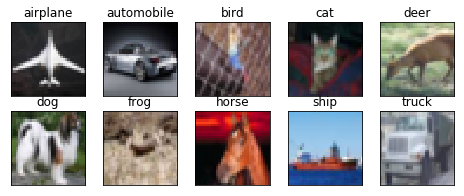

In [3]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [7]:
train_features.shape

(50000, 32, 32, 3)

In [0]:
from keras.layers import *
from keras.models import Model


In [9]:
inputs = Input(shape=(32,32,3,))

'''Normal_conv_block consists of a 3*3 convolution with n no of layers dilation rate default fixed to 1 
    
   spatiallySeparable first Conv2D(3,1) then Conv2D(1,3)  

   grouping for concatenating the channels
   
'''





def Normal_conv_block(x,layers,k=(5,5),dil=1,dout=0.1):
  
  x=Convolution2D(layers,kernel_size=k,border_mode='same',activation='relu')(x)
  x=BatchNormalization()(x)
  
  return x

  


W0618 14:05:51.566833 139745933555584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0618 14:05:51.586109 139745933555584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



### Functional Api model Keras 
`SpatiallySeparableConvolution is a normal Conv2D(3,1) follwed by Conv2D(1,3)`

In [17]:

DepthwiseSep1=SeparableConv2D(64, kernel_size=(5,5), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(inputs)
#Depthwise Separable provided by keras

DepthwiseSep1=BatchNormalization()(DepthwiseSep1)

Conv1=Normal_conv_block(DepthwiseSep1,128)

Conv2=Normal_conv_block(Conv1,256)

DepthwiseSep2=concatenate([Conv2,DepthwiseSep1],axis=-1)




DepthwiseSep2=SeparableConv2D(256, kernel_size=(5,5), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(DepthwiseSep2)

DepthwiseSep2=BatchNormalization()(DepthwiseSep2)

Mp1=concatenate([DepthwiseSep1,DepthwiseSep2],axis=-1)

Mp1=MaxPooling2D(pool_size=(2,2))(Mp1)

Mp1=Lambda(Depth2space)(Mp1)


DepthwiseSep3=SeparableConv2D(64, kernel_size=(3,3), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(Mp1)

DepthwiseSep3=BatchNormalization()(DepthwiseSep3)

Conv3=concatenate([DepthwiseSep1,DepthwiseSep2,DepthwiseSep3],axis=-1)

Conv3=Normal_conv_block(Conv1,128)

DepthwiseSep4=concatenate([Conv3,DepthwiseSep1,DepthwiseSep2,DepthwiseSep3],axis=-1)

DepthwiseSep4=SeparableConv2D(128, kernel_size=(5,5), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(DepthwiseSep4)

DepthwiseSep4=BatchNormalization()(DepthwiseSep4)

DepthwiseSep5=concatenate([Conv3,DepthwiseSep1,DepthwiseSep2,DepthwiseSep3,DepthwiseSep4,Conv2],axis=-1)

DepthwiseSep5=SeparableConv2D(128, kernel_size=(3,3), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(DepthwiseSep5)

DepthwiseSep5=BatchNormalization()(DepthwiseSep5)

Mp2=concatenate([DepthwiseSep1,DepthwiseSep2,DepthwiseSep3,DepthwiseSep4,DepthwiseSep5],axis=-1)

Mp2=MaxPooling2D(pool_size=(2,2),border_mode='same')(Mp2)


# print(Mp2.shape)
Mp2=Lambda(Depth2space)(Mp2)

# print(Mp2.shape)
Conv4=concatenate([Mp2,Conv3],axis=-1)

Conv4=Normal_conv_block(Conv4,128)

DepthwiseSep6=concatenate([Conv1,Conv2,DepthwiseSep4,DepthwiseSep2],axis=-1)

DepthwiseSep6=SeparableConv2D(128, kernel_size=(5,5), strides=(1, 1), border_mode='same', data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1, activation='relu')(DepthwiseSep6)

DepthwiseSep6=BatchNormalization()(DepthwiseSep6)

Conv5=concatenate([Conv1,Conv2,DepthwiseSep3,DepthwiseSep6],axis=-1)

Conv5=Normal_conv_block(Conv5,64,k=(3,3))

DepthwiseSep7=concatenate([Conv2,DepthwiseSep4,DepthwiseSep1,DepthwiseSep2,Conv5,DepthwiseSep6],axis=-1)


DepthwiseSep7=SeparableConv2D(32, kernel_size=(5,5), strides=(1, 1), border_mode='same', activation='relu',data_format=None, use_bias=False,dilation_rate=(1, 1), depth_multiplier=1)(DepthwiseSep7)

DepthwiseSep7=BatchNormalization()(DepthwiseSep7)

softmax=concatenate([DepthwiseSep2,DepthwiseSep4,DepthwiseSep6,DepthwiseSep7],axis=-1)

softmax=Convolution2D(10,kernel_size=(1,1))(softmax)
softmax=GlobalAvgPool2D()(softmax)
softmax=Activation('softmax')(softmax)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(64, kernel_size=(5, 5), strides=(1, 1), data_format=None, use_bias=False, dilation_rate=(1, 1), depth_multiplier=1, activation="relu", padding="same")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, kernel_size=(5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, kernel_size=(5, 5), activation="relu", padding="same")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `SeparableConv2D` call to the Keras 2 API: `SeparableConv2D(256, kernel_size=(5, 5), strides=(1, 1), data_format=None, use_bias=False, dilation_rate=(1, 1), depth_multiplier=1, activation="relu", padding="same")`
  app.l

In [0]:

model = Model(inputs=inputs, outputs=softmax)


In [19]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
separable_conv2d_15 (SeparableC (None, 32, 32, 64)   267         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_25 (BatchNo (None, 32, 32, 64)   256         separable_conv2d_15[0][0]        
__________________________________________________________________________________________________
conv2d_12 (Conv2D)              (None, 32, 32, 128)  204928      batch_normalization_25[0][0]     
__________________________________________________________________________________________________
batch_norm

`Training with model checkpoints`

W0618 14:14:26.511911 139745933555584 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=390, epochs=50)`
W0618 14:14:26.642076 139745933555584

Epoch 1/50
390/390 [==============================] - 194s 496ms/step - loss: 1.4132 - acc: 0.4886 - val_loss: 2.1215 - val_acc: 0.4243

Epoch 00001: val_acc improved from -inf to 0.42430, saving model to Best_weights.hdf5
Epoch 2/50
390/390 [==============================] - 186s 477ms/step - loss: 0.9657 - acc: 0.6614 - val_loss: 0.8842 - val_acc: 0.6877

Epoch 00002: val_acc improved from 0.42430 to 0.68770, saving model to Best_weights.hdf5
Epoch 3/50
390/390 [==============================] - 182s 467ms/step - loss: 0.7317 - acc: 0.7472 - val_loss: 0.9080 - val_acc: 0.6957

Epoch 00003: val_acc improved from 0.68770 to 0.69570, saving model to Best_weights.hdf5
Epoch 4/50
390/390 [==============================] - 182s 468ms/step - loss: 0.5816 - acc: 0.7999 - val_loss: 0.7518 - val_acc: 0.7440

Epoch 00004: val_acc improved from 0.69570 to 0.74400, saving model to Best_weights.hdf5
Epoch 5/50
390/390 [==============================] - 182s 467ms/step - loss: 0.4704 - acc: 0.8375 

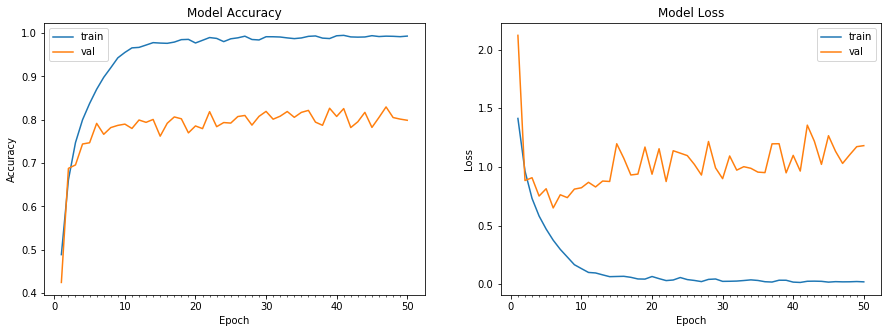

Accuracy on test data is: 79.88


In [20]:
from keras.preprocessing.image import ImageDataGenerator

from keras.callbacks import ModelCheckpoint

filepath="Best_weights.hdf5"

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 256),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels),callbacks=[checkpoint], verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=1, steps_per_epoch=195, epochs=50)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/50
195/195 [==============================] - 189s 971ms/step - loss: 0.0053 - acc: 0.9985 - val_loss: 0.8990 - val_acc: 0.8383

Epoch 00001: val_acc improved from 0.82960 to 0.83830, saving model to Best_weights.hdf5
Epoch 2/50
195/195 [==============================] - 180s 922ms/step - loss: 8.8985e-04 - acc: 0.9999 - val_loss: 0.8616 - val_acc: 0.8443

Epoch 00002: val_acc improved from 0.83830 to 0.84430, saving model to Best_weights.hdf5
Epoch 3/50
195/195 [==============================] - 180s 923ms/step - loss: 3.2736e-04 - acc: 1.0000 - val_loss: 0.8501 - val_acc: 0.8443

Epoch 00003: val_acc did not improve from 0.84430
Epoch 4/50
195/195 [==============================] - 180s 923ms/step - loss: 2.3560e-04 - acc: 1.0000 - val_loss: 0.8569 - val_acc: 0.8458

Epoch 00004: val_acc improved from 0.84430 to 0.84580, saving model to Best_weights.hdf5
Epoch 5/50
195/195 [==============================] - 180s 922ms/step - loss: 1.9085e-04 - acc: 1.0000 - val_loss: 0.8576 -